# Classification

In [16]:
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split as tts

## Load the Dataset

In [2]:
iris=sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le=LabelEncoder()

In [6]:
iris['label']=le.fit_transform(iris['species'])

## Features and Labels

In [7]:
x=iris.drop(columns=['species','label'],axis=1)

In [8]:
y=iris['label']

In [9]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y.tail()

145    2
146    2
147    2
148    2
149    2
Name: label, dtype: int64

## Dividing into training and testing data set

In [13]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.2,stratify=y,random_state=10,
                             shuffle=True)

In [18]:
from keras.utils import to_categorical

In [19]:
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

## Defining the Model

In [14]:
model=Sequential()

In [17]:
model.add(Dense(16, input_shape=(x.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\CDAC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [21]:
history = model.fit(xtrain, ytrain,
                    validation_data=(xtest, ytest),
                    epochs=100,
                    batch_size=8,
                    verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3780 - loss: 1.9429 - val_accuracy: 0.3333 - val_loss: 1.5102
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3621 - loss: 1.5702 - val_accuracy: 0.4667 - val_loss: 1.2354
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3061 - loss: 1.3834 - val_accuracy: 0.3333 - val_loss: 1.1381
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2806 - loss: 1.2183 - val_accuracy: 0.3333 - val_loss: 1.1069
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3063 - loss: 1.2152 - val_accuracy: 0.3000 - val_loss: 1.0913
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1999 - loss: 1.1978 - val_accuracy: 0.3000 - val_loss: 1.0620
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4582 - loss: 1.0161 - val_accuracy: 0.4000 - val_loss: 1.0328
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4959 - loss: 1.0339 - val_accuracy: 0.4333 - 

## Model Visualization

C:\Users\CDAC\AppData\Local\Programs\Python\Python312\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


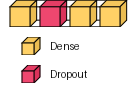

In [30]:
import visualkeras as vk
vk.layered_view(model,legend=True)

## Model Evaluation

In [22]:
loss, acc = model.evaluate(xtest, ytest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.1264


In [23]:
loss

0.12640148401260376

In [24]:
acc*100

100.0

## Prediction

In [25]:
import numpy as np

In [27]:
pred=model.predict(np.array([[5.1,3.5,1.4,0.2]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [28]:
t=np.argmax(pred,axis=1)

In [29]:
t

array([0])

# Regression

In [32]:
import pandas as pd
mark=pd.read_csv('score_updated.csv')

## Dividing into x and y

In [33]:
x1=mark[['Hours']]
y1=mark['Scores']

## Splitting into train and test dataset

In [34]:
xtrain1,xtest1,ytrain1,ytest1=tts(x1,y1,test_size=0.2)

## Define the Model

In [35]:
reg=Sequential()
reg.add(Dense(16, input_dim=1, activation='relu'))
reg.add(Dense(8, activation='relu'))
reg.add(Dense(1)) 

C:\Users\CDAC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model

In [36]:
reg.compile(optimizer='adam', loss='mse', metrics=['mae'])

## Training the Model

In [37]:
reg.fit(xtrain1,ytrain1,validation_data=(xtest1, ytest1),
                    epochs=200, verbose=1)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 3241.6550 - mae: 51.2460 - val_loss: 5233.7905 - val_mae: 68.4520
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3200.4976 - mae: 51.1459 - val_loss: 5203.7344 - val_mae: 68.2531
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3017.3865 - mae: 49.4842 - val_loss: 5174.2744 - val_mae: 68.0577
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3366.6646 - mae: 52.2270 - val_loss: 5145.0005 - val_mae: 67.8629
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3107.9919 - mae: 50.3089 - val_loss: 5115.9873 - val_mae: 67.6694
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3195.7705 - mae: 50.7586 - val_loss: 5086.9531 - val_mae: 67.4752
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3085.6028 - mae: 50.1953 - val_loss: 5058.0166 - val_mae: 67.2819
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3164.2573 - mae: 50.8034 - val_loss: 5030.8579 - val_mae: 67.1047
Epoch 9/

## Evaluation

In [38]:
loss1, mae1 = reg.evaluate(xtest1, ytest1)
print(mae1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 27.2696 - mae: 4.2780
4.278021812438965


## Prediction

In [39]:
reg.predict(np.array([[8.5]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[80.14354]], dtype=float32)